In [2]:
import tensorflow as tf

tesnorflow import (약 40초 소요)
tensorflow Version: 2.12.0

In [3]:
print(tf.__version__)

2.12.0


numpy, matplotlib.pyplot import 

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

(0.0, 8.0)

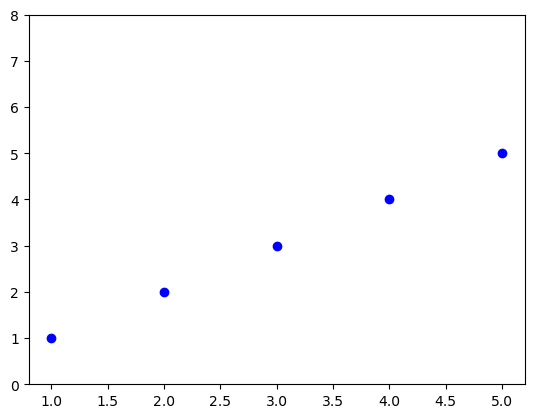

In [18]:
plt.plot(x_data, y_data, 'bo')
plt.ylim(0, 8)  # ylim 은 y축 범위를 제한 (0~8까지)

### Hypothesis

In [8]:
v = [1., 2., 3., 4.]
tf.reduce_mean(v)       #2.5

<tf.Tensor: shape=(), dtype=float32, numpy=2.5>

reduce_mean() 은 특정 차원을 제거하고 평균을 구함

In [9]:
tf.square(9)        #81

<tf.Tensor: shape=(), dtype=int32, numpy=81>

square() 는 제곱을 계산

In [10]:

x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

# W, b 초기화
W = tf.Variable(2.0)
b = tf.Variable(0.5)

hypothesis = W * x_data + b

In [11]:
W.numpy(), b.numpy()

(2.0, 0.5)

.numpy()는 NumPy 배열로 변환해 줌

In [12]:
hypothesis.numpy()

array([ 2.5,  4.5,  6.5,  8.5, 10.5], dtype=float32)

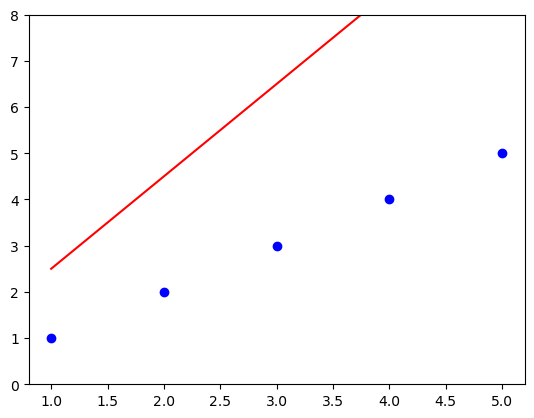

In [13]:
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'bo')
plt.ylim(0, 8)
plt.show()

### Cost

In [14]:
cost = tf.reduce_mean(tf.square(hypothesis - y_data))   # 평균 제곱 오차를 비용으로 사용

In [16]:
with tf.GradientTape() as tape:
    hypothesis = W * x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))

W_grad, b_grad = tape.gradient(cost,[W, b])
W_grad.numpy(), b_grad.numpy()

(25.0, 7.0)

with expression [as variable]:
    # code block
 자원을 획득하고 사용 후 반납해야 하는 경우 주로 사용

tf.GradientTape() = 자동 미분을 위한 API
자동 미분 = 주어진 입력 변수에 대한 연산의 gradient를 계산 하는 것
tf.Gradient는 컨텍스트 안에서 실행된 모든 연산을 테이프에 기록

일부 연산을 기록한 후에는 GradientTape.gradient(target, sources)를 사용하여 일부 소스 (종종  모델 변수)에 상대적인 일부 대상(종종 손실)의 그래디언트를 계산

### 파라미터 업데이트

In [17]:
learning_rate = 0.01
W.assign_sub(learning_rate * W_grad)  # W -= learning_rate * W_grad
b.assign_sub(learning_rate * b_grad)  # b -= learning_rate * b_grad

W.numpy(), b.numpy()

(1.75, 0.43)

(0.0, 8.0)

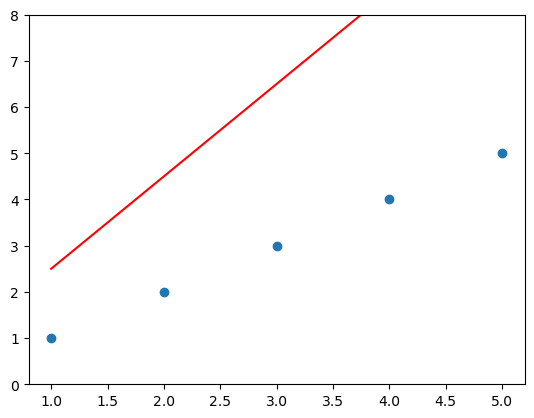

In [19]:
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)

### 여러 번 반복

    0 |     2.4580 |   0.278000
   10 |     1.1271 |  -0.086446
   20 |     1.0367 |  -0.107438
   30 |     1.0297 |  -0.105465
   40 |     1.0283 |  -0.102061
   50 |     1.0273 |  -0.098669
   60 |     1.0264 |  -0.095384
   70 |     1.0255 |  -0.092208
   80 |     1.0247 |  -0.089137
   90 |     1.0239 |  -0.086169


(0.0, 8.0)

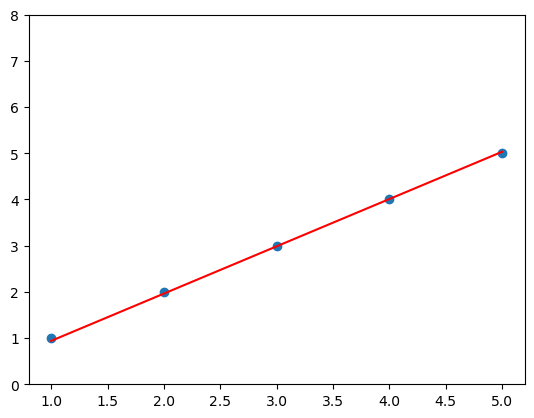

In [20]:
W = tf.Variable(2.9)
b  = tf.Variable(0.4)

for i in range(100):
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)

    if i % 10 == 0:
        print("{:5} | {:10.4f} | {:10.6f}".format(i, W.numpy(), b.numpy(), cost))

plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.ylim(0,8)

### predict

In [21]:
print(W * 5 + b)
print(W * 2.5 + b)

tf.Tensor(5.032172, shape=(), dtype=float32)
tf.Tensor(2.4742951, shape=(), dtype=float32)
